In [96]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
Data_application_record = pd.read_csv("./application_record.csv")
Data_credit_record = pd.read_csv("./credit_record.csv")

# Merging Two Datasets 

In [79]:
df_record = Data_application_record.merge(Data_credit_record, how='left', on='ID')
df_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN,NaN
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN,NaN


# DATA CLEANING

 1. altering Nan values

In [61]:
df_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [40]:
df_record['MONTHS_BALANCE'].describe()

count    777715.000000
mean        -19.373564
std          14.082208
min         -60.000000
25%         -29.000000
50%         -17.000000
75%          -8.000000
max           0.000000
Name: MONTHS_BALANCE, dtype: float64

In [80]:
df_record.OCCUPATION_TYPE.fillna("Unknown", inplace=True)
df_record.MONTHS_BALANCE.fillna(0, inplace = True)
df_record.STATUS.fillna(0, inplace = True)

In [63]:
df_record.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

 2.  Adding number of family members with number of children to get overall family members.

In [64]:
df_record.loc[df_record['CNT_CHILDREN'] >= 1, 'CNT_FAM_MEMBERS']

425        2.0
426        2.0
427        2.0
428        2.0
429        2.0
          ... 
1179797    3.0
1179800    3.0
1179801    3.0
1179803    1.0
1179806    3.0
Name: CNT_FAM_MEMBERS, Length: 360306, dtype: float64

In [81]:
# Adding number of family members with number of children to get overall family members.
df_record['Total_FAM_MEMBERS'] = df_record['CNT_FAM_MEMBERS'] + df_record['CNT_CHILDREN']

In [66]:
df_record['Total_FAM_MEMBERS']

0          2.0
1          2.0
2          2.0
3          2.0
4          2.0
          ... 
1179810    1.0
1179811    1.0
1179812    1.0
1179813    2.0
1179814    2.0
Name: Total_FAM_MEMBERS, Length: 1179815, dtype: float64

3. changing the labels for status

In [82]:
df_record.STATUS.replace('X', 0, inplace=True)
df_record.STATUS.replace('C', 0, inplace=True)
df_record.STATUS.replace('1', 1, inplace=True)
df_record.STATUS.replace('2', 2, inplace=True)
df_record.STATUS.replace('3', 3, inplace=True)
df_record.STATUS.replace('4', 4, inplace=True)
df_record.STATUS.replace('5', 5, inplace=True)
df_record.STATUS = df_record.STATUS.astype('int')
df_record.STATUS = df_record.STATUS.apply(lambda x: 1 if x >= 2 else 0)
df_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Total_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,0.0,0,2.0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-1.0,0,2.0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-2.0,0,2.0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-3.0,0,2.0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,-4.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,Unknown,1.0,0.0,0,1.0
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-3007,1,0,0,0,Laborers,1.0,0.0,0,1.0
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,-372,1,1,0,0,Sales staff,1.0,0.0,0,1.0
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,Unknown,2.0,0.0,0,2.0


In [83]:
print('There are '+str(df_record.STATUS.sum()) +' rejected applicants\n', str(round(df_record.STATUS.sum()/len(df_record)*100,2)) +'% in 1179815  applicants')

There are 2828 rejected applicants
 0.24% in 1179815  applicants


4. dropping all the flag columns

In [84]:
################ dropping columns 
drop_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL']
df_record = df_record.drop(drop_cols, axis = 1)
df_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Total_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unknown,2.0,0.0,0,2.0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unknown,2.0,-1.0,0,2.0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unknown,2.0,-2.0,0,2.0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unknown,2.0,-3.0,0,2.0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Unknown,2.0,-4.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,Unknown,1.0,0.0,0,1.0
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,Laborers,1.0,0.0,0,1.0
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,Sales staff,1.0,0.0,0,1.0
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,Unknown,2.0,0.0,0,2.0


In [53]:
#converting birth years and days employed to years.
df_record['DAYS_BIRTH'] = np.abs(df_record['DAYS_BIRTH']/365)
df_record['DAYS_EMPLOYED'] = df_record['DAYS_EMPLOYED']/365 
df_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,Unknown,2.0,0.0,-1.0
1,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,Unknown,2.0,-1.0,-1.0
2,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,Unknown,2.0,-2.0,-1.0
3,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,Unknown,2.0,-3.0,-1.0
4,5008804,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,Unknown,2.0,-4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.238356,1000.665753,Unknown,1.0,0.0,0.0
1179811,6840222,F,N,N,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43.668493,-8.238356,Laborers,1.0,0.0,0.0
1179812,6841878,F,N,N,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.380822,-1.019178,Sales staff,1.0,0.0,0.0
1179813,6842765,F,N,Y,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.378082,1000.665753,Unknown,2.0,0.0,0.0


# EDA

5. AAnalysing by car and gender basis

<AxesSubplot:ylabel='FLAG_OWN_CAR'>

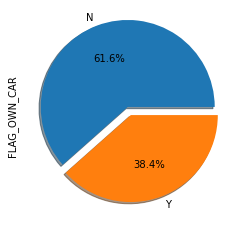

In [85]:
df_record['FLAG_OWN_CAR'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:ylabel='CODE_GENDER'>

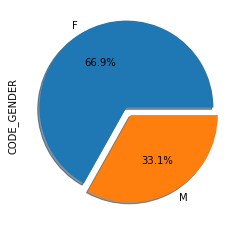

In [86]:
df_record['CODE_GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

6. Analyzing based on family count , education type and gender

In [88]:
plot1 = df_record.pivot_table(index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', values=['Total_FAM_MEMBERS'], aggfunc='size')

In [56]:
plot1

CODE_GENDER,F,M
NAME_EDUCATION_TYPE,,
Academic degree,831,286
Higher education,217860,103431
Incomplete higher,26336,17434
Lower secondary,7366,4966
Secondary / secondary special,536468,264837


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

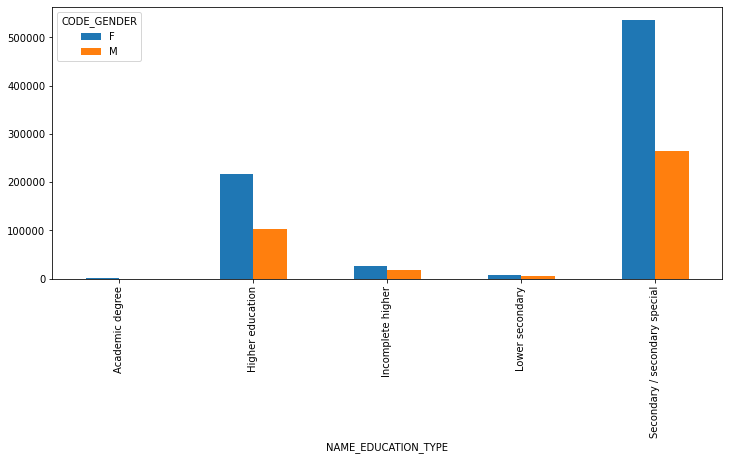

In [89]:
plot1.plot(kind='bar', figsize=(12, 5))

<AxesSubplot:xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

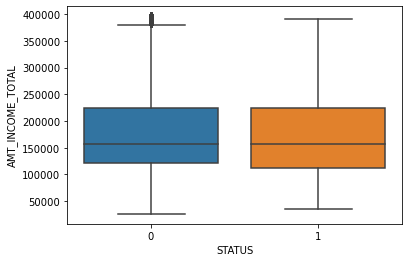

In [94]:
plot2 = sns.boxplot(x="STATUS", y="AMT_INCOME_TOTAL", data=df_record[df_record.AMT_INCOME_TOTAL<=400000])
plot2

Rejection status Based on income type

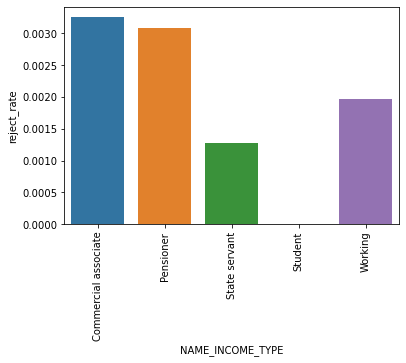

,NAME_INCOME_TYPE,count,reject_times,reject_rate
0,Commercial associate,275652,897.0,0.003254
1,Pensioner,197733,610.0,0.003085
2,State servant,98638,125.0,0.001267
3,Student,343,0.0,0.000000
4,Working,607449,1196.0,0.001969


In [109]:
total=df_record.groupby(by=['NAME_INCOME_TYPE']).size().reset_index(name='count')
reject = df_record[df_record.STATUS==1].groupby(by=['NAME_INCOME_TYPE']).size().reset_index(name='reject_times')
reject_rate = pd.merge(total, reject, how='outer', on=['NAME_INCOME_TYPE']).fillna(0)
reject_rate['reject_rate'] = reject_rate['reject_times'] / reject_rate['count']
ax = sns.barplot(x="NAME_INCOME_TYPE", y="reject_rate", data=reject_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()
reject_rate

Rejection status based on education type 

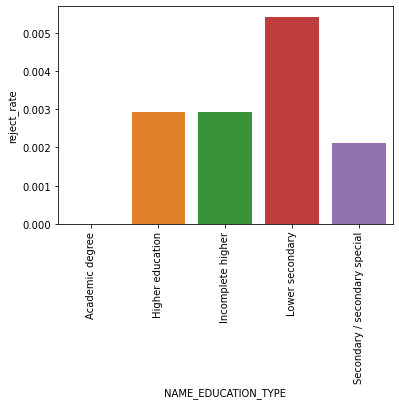

,NAME_EDUCATION_TYPE,count,reject_times,reject_rate
0,Academic degree,1117,0.0,0.000000
1,Higher education,321291,937.0,0.002916
2,Incomplete higher,43770,128.0,0.002924
3,Lower secondary,12332,67.0,0.005433
4,Secondary / secondary special,801305,1696.0,0.002117


In [108]:
total=df_record.groupby(by=['NAME_EDUCATION_TYPE']).size().reset_index(name='count')
reject = df_record[df_record.STATUS==1].groupby(by=['NAME_EDUCATION_TYPE']).size().reset_index(name='reject_times')
reject_rate = pd.merge(total, reject, how='outer', on=['NAME_EDUCATION_TYPE']).fillna(0)
reject_rate['reject_rate'] = reject_rate['reject_times'] / reject_rate['count']
ax = sns.barplot(x="NAME_EDUCATION_TYPE", y="reject_rate", data=reject_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()
reject_rate

Rejection status based on Housing type 

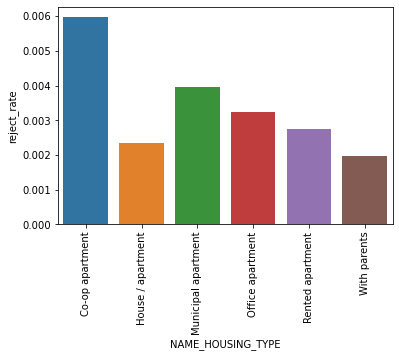

,NAME_HOUSING_TYPE,count,reject_times,reject_rate
0,Co-op apartment,5026,30,0.005969
1,House / apartment,1058434,2469,0.002333
2,Municipal apartment,37726,149,0.003950
3,Office apartment,9296,30,0.003227
4,Rented apartment,16297,45,0.002761
5,With parents,53036,105,0.001980


In [106]:
total=df_record.groupby(by=['NAME_HOUSING_TYPE']).size().reset_index(name='count')
reject = df_record[df_record.STATUS==1].groupby(by=['NAME_HOUSING_TYPE']).size().reset_index(name='reject_times')
reject_rate = pd.merge(total, reject, how='outer', on=['NAME_HOUSING_TYPE']).fillna(0)
reject_rate['reject_rate'] = reject_rate['reject_times'] / reject_rate['count']
ax = sns.barplot(x="NAME_HOUSING_TYPE", y="reject_rate", data=reject_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()
reject_rate

Rejection status based on Occupation type 

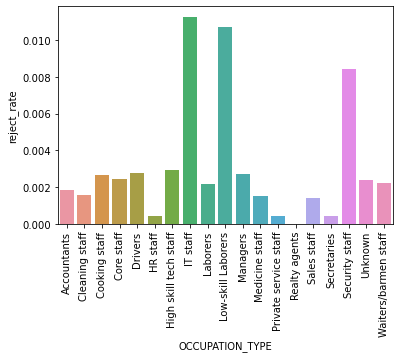

,OCCUPATION_TYPE,count,reject_times,reject_rate
0,Accountants,41967,76.0,0.001811
1,Cleaning staff,16693,26.0,0.001558
2,Cooking staff,20837,55.0,0.002640
3,Core staff,116528,284.0,0.002437
4,Drivers,71630,199.0,0.002778
5,HR staff,2375,1.0,0.000421
6,High skill tech staff,47674,139.0,0.002916
7,IT staff,1863,21.0,0.011272
8,Laborers,203601,438.0,0.002151
9,Low-skill Laborers,5588,60.0,0.010737


In [107]:
total=df_record.groupby(by=['OCCUPATION_TYPE']).size().reset_index(name='count')
reject = df_record[df_record.STATUS==1].groupby(by=['OCCUPATION_TYPE']).size().reset_index(name='reject_times')
reject_rate = pd.merge(total, reject, how='outer', on=['OCCUPATION_TYPE']).fillna(0)
reject_rate['reject_rate'] = reject_rate['reject_times'] / reject_rate['count']
ax = sns.barplot(x="OCCUPATION_TYPE", y="reject_rate", data=reject_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()
reject_rate